In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

from importlib import reload
plt=reload(plt)
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

import warnings
warnings.filterwarnings('ignore')


In [ ]:
!wget 'https://drive.google.com/uc?id=149EjiR3PUEmotXbtfDvYU_hBZPH8Kl3m' -O adm_data.csv


--2023-01-10 21:01:37--  https://drive.google.com/uc?id=149EjiR3PUEmotXbtfDvYU_hBZPH8Kl3m
Resolving drive.google.com (drive.google.com)... 172.253.115.139, 172.253.115.113, 172.253.115.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u802qvj3v3k4toj56ti8k5td8122avjl/1673384475000/02611596255248067438/*/149EjiR3PUEmotXbtfDvYU_hBZPH8Kl3m?uuid=880b51d1-0334-455b-864f-ba5620c12a78 [following]
--2023-01-10 21:01:38--  https://doc-0k-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u802qvj3v3k4toj56ti8k5td8122avjl/1673384475000/02611596255248067438/*/149EjiR3PUEmotXbtfDvYU_hBZPH8Kl3m?uuid=880b51d1-0334-455b-864f-ba5620c12a78
Resolving doc-0k-84-docs.googleusercontent.com (doc-0k-84-docs.googleusercontent.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to do

In [ ]:
DATASET_PATH = 'adm_data.csv'
PREP_DATASET_TRAIN = 'adm_data_train.csv'
PREP_DATASET_TEST =  'adm_data_test.csv'

In [ ]:
df = pd.read_csv(DATASET_PATH, sep=',')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(400, 9)

Данные не имеют строкового типа, хотя половину данных можно считать категориальными

In [ ]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Нет пропусков

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Отредактируем названия колонок

In [ ]:
for col in df.columns:
  new_col = col.rstrip()
  df.rename(columns={col:new_col}, inplace=True)


# Анализ целевой переменной

Целевая переменная представлена числовым признаком, имеет относительно номальное распределение. Выбросов не имеет. Наибольшую плотность имеется в области значений, выше средних.

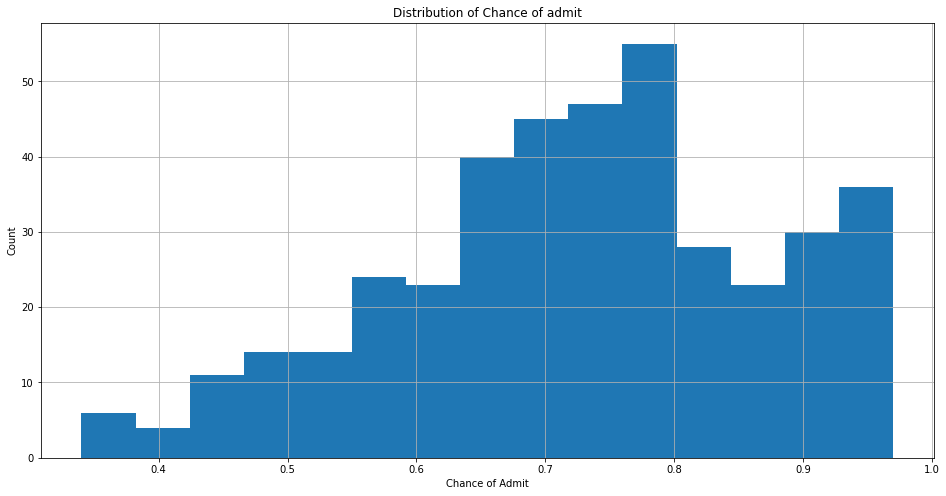

In [ ]:
plt.figure(figsize=(16,8))
df['Chance of Admit'].hist(bins=15)

plt.xlabel('Chance of Admit')
plt.ylabel('Count')

plt.title('Distribution of Chance of admit')



plt.show()

Если посмотреть на три количественных признака, то можно увидеть "колоколообразное" распределение, что также говорит о его близкости к среднему. Выбросов нет

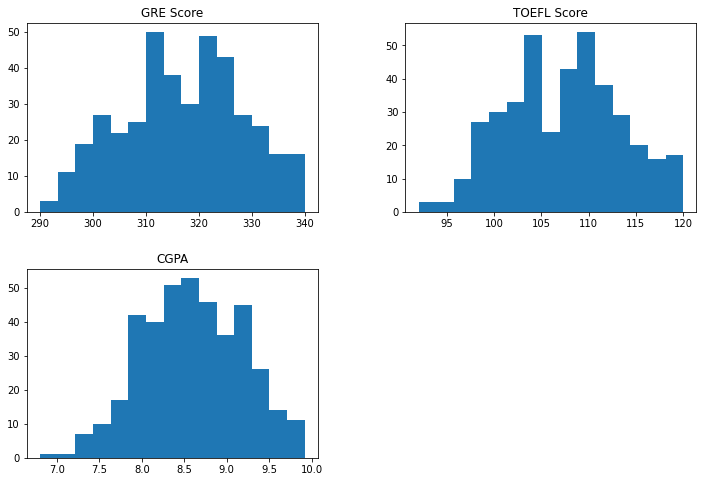

In [ ]:
df[['GRE Score', 'TOEFL Score', 'CGPA']].hist(figsize=(12,8), bins=15, grid=False)
plt.show()

In [ ]:
def quality_feature(feature, title):
  counts = feature.value_counts()
  sns.barplot(counts.index, counts.values)
  plt.title(title)
  plt.show()
  return ''

Моды категориальных признаков также имеют средние значения. Число наличия исследовательских работ у студентов  выше чем отсутствие.

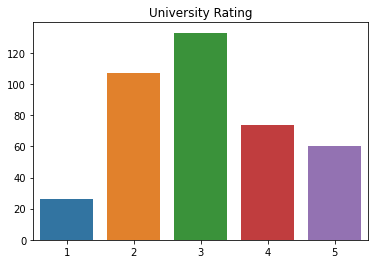

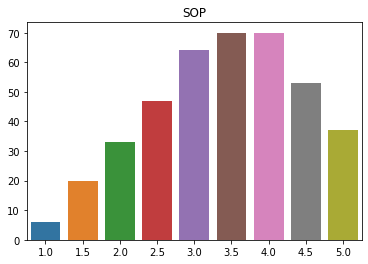

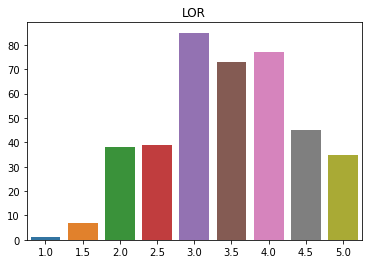

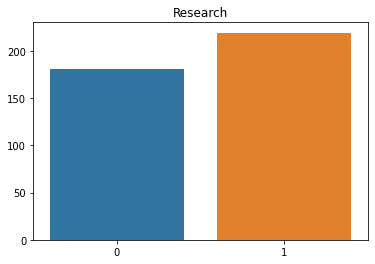

In [ ]:
qual_feat= ['University Rating', 'SOP', 'LOR', 'Research']
for col in df[qual_feat]:
  quality_feature(df[col],col)




In [ ]:
corr_matrix = df.corr()
corr_matrix[np.abs(corr_matrix) < 0.3] = 0


Корреляционная матрица показывает сильные зависимости между  количественными признаками линейного типа (это видно будет на графиках ниже)


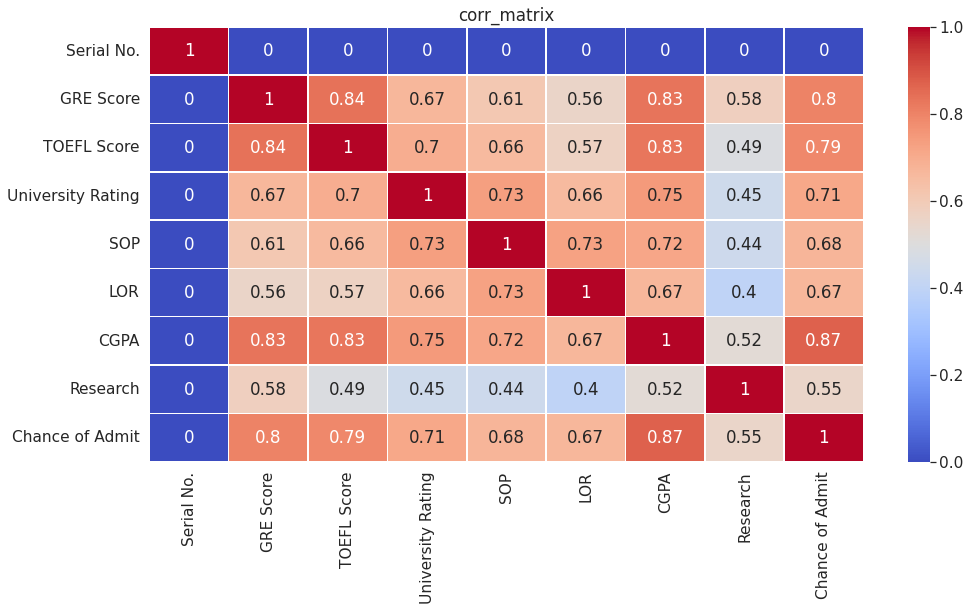

In [ ]:
plt.figure(figsize=(16,8))

sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('corr_matrix')
plt.show()



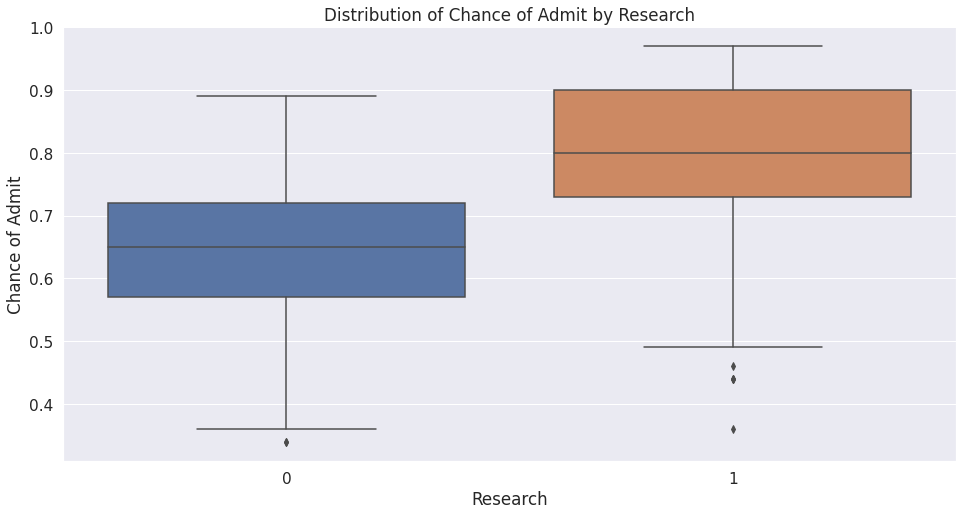

In [ ]:
plt.figure(figsize=(16,8))

sns.boxplot(df['Research'], df['Chance of Admit'])

plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.title('Distribution of Chance of Admit by Research')

plt.show()


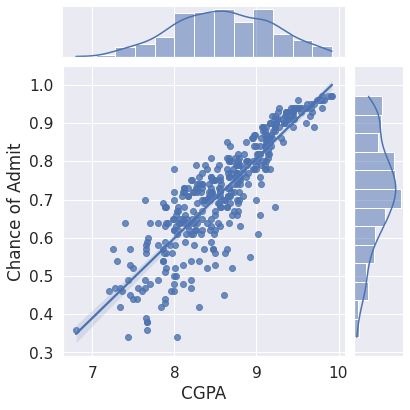

In [ ]:
sns.jointplot(df['CGPA'], df['Chance of Admit'], kind='reg')
plt.show()

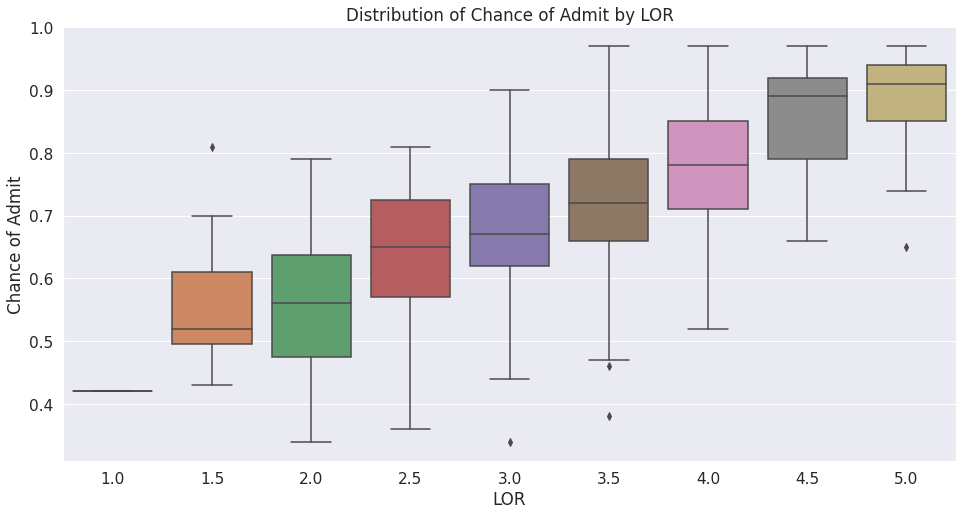

In [ ]:
plt.figure(figsize=(16,8))

sns.boxplot(df['LOR'], df['Chance of Admit'])
plt.xlabel('LOR')
plt.ylabel('Chance of Admit')
plt.title('Distribution of Chance of Admit by LOR')

plt.show()


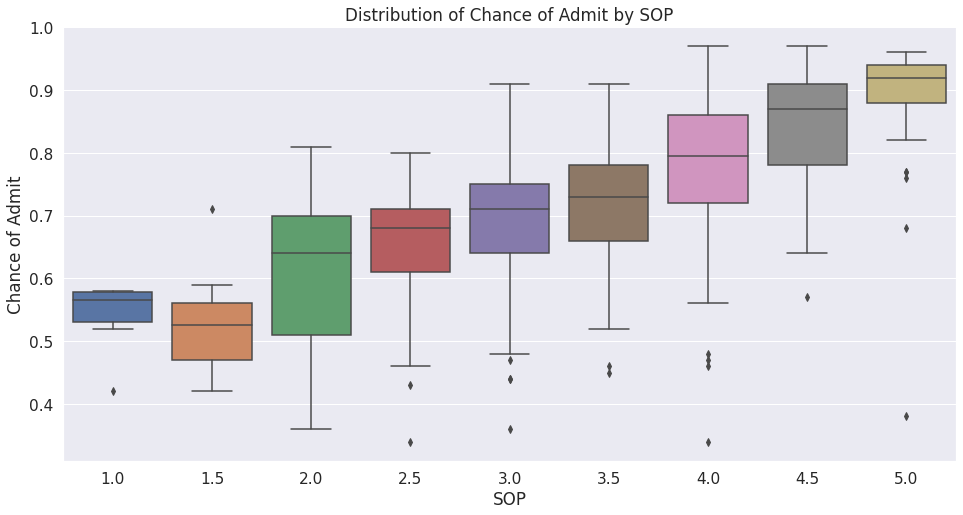

In [ ]:
plt.figure(figsize=(16,8))

sns.boxplot(df['SOP'], df['Chance of Admit'])
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')
plt.title('Distribution of Chance of Admit by SOP')

plt.show()

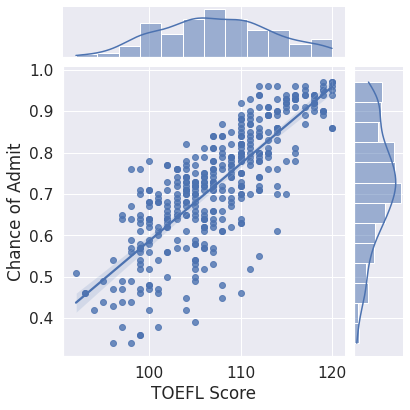

In [ ]:
sns.jointplot(df['TOEFL Score'], df['Chance of Admit'], kind='reg')
plt.show()

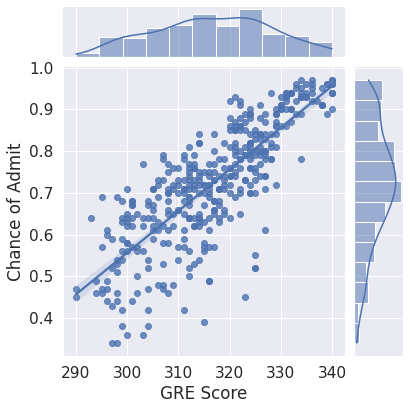

In [ ]:
sns.jointplot(df['GRE Score'], df['Chance of Admit'], kind='reg')
plt.show()

In [ ]:
X = df[df.columns[1:-1]]
y = df['Chance of Admit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=42)

In [ ]:
X_train.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
lr_model.coef_


array([0.00183981, 0.00317072, 0.00486626, 0.00099469, 0.0136946 ,
       0.11781823, 0.01843913])

In [ ]:
lr_model.intercept_



-1.2841780563001732

In [ ]:
y_train

157    0.65
109    0.68
17     0.65
347    0.42
24     0.97
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit, Length: 280, dtype: float64

In [ ]:
y_train_pred = lr_model.predict(X_train)
y_train_pred.shape

(280,)

Модель показала хорошие результаты на тренировочных данных

In [ ]:
np.sqrt(mse(y_train,y_train_pred)), r2(y_train,y_train_pred)

(0.06150717710648238, 0.8019807331500792)

In [ ]:
y_test_pred = lr_model.predict(X_test)

Такие же результаты модель показала и на тестовых данных

In [ ]:
np.sqrt(mse(y_test, y_test_pred)),r2(y_test, y_test_pred)

(0.06821159612911354, 0.7955991554684618)